In [53]:
# ! pip install scikit-learn
# !pip install xgboost
# ! pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
import shap
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

### Data Processing

In [56]:
df = pd.read_csv('../data/preprocessed/final_dataset.csv')
df.head()

/var/folders/wt/t8qzr89n2f14ym8lqf9x2tb40000gp/T/ipykernel_13891/1496186125.py:1: DtypeWarning: Columns (0: neighbourhood_group_cleansed) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/final_dataset.csv')


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry,source_city,index_right,GEOID,ALAND,area_sqmiles,crime_count,population,NatWalkInd,host_response_time_ord,amenities_list,safety_amenities_count,convenience_amenities_count,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,room_type_nan,is_unique_stay,population_per_sqmile,crime_per_1000,crime_per_sqmile,host_years,price_per_person,dist_km_downtown,dist_km_airport,log_dist_km_downtown,log_dist_km_airport,source_city_LA,source_city_OAK,source_city_SD,source_city_SF,source_city_nan,listing_age_years,reviews_per_year,bathrooms_per_bedroom
0,3083,https://www.airbnb.com/rooms/3083,20250925032724,2025-09-25,city scrape,Room #2 - West Oakland,"4 blocks from West Oakland BART, 1 stop to San...",The neighborhood is in a historic district wit...,https://a0.muscache.com/pictures/hosting/Hosti...,3518,https://www.airbnb.com/users/show/3518,Traci,2008-10-08,"Oakland, CA","Hello! I am Traci, an Artist and activist who ...",within an hour,1.00,1.00,1.0,https://a0.muscache.com/im/pictures/user/40746...,https://a0.muscache.com/im/pictures/user/40746...,Prescott,7.0,7.0,"['email', 'phone']",1.0,1.0,Neighborhood highlights,Prescott,NaN,37.810130,-122.292660,Private room in home,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Self check-in"", ""Coffee maker"", ""Private bac...",125.0,1,365,1.0,1.0,365.0,1125.0,1.0,943.8,NaN,t,21,51,81,87,2025-09-25,78,12,1,87,7,72,9000.0,2014-08-02,2025-08-28,4.74,4.78,4.68,4.88,4.88,4.54,4.72,NaN,1.0,7,0,7,0,0.57,POINT (-122.29266 37.81013),OAK,8941.0,6.001402e+09,715808.0,0.276373,495.0,2385.0,16.666667,0.0,"['Self check-in', 'Coffee maker', 'Private bac...",4,5,0,0,1,0,0,0,8629.627187,207.547170,1791.054699,16.98,62.5,1.996492,11.714659,1.097442,2.542756,0,1,0,0,0,11.156164,6.498760,1.00
1,5739,https://www.airbnb.com/rooms/5739,20250925032724,2025-09-25,city scrape,Mod Studio,"The Mod Studio is a cozy, clean and convenient...","We love the proximity to great restaurants, Wh...",https://a0.muscache.com/pictures/116966/376a1f...,9276,https://www.airbnb.com/users/show/9276,Leah And Gyorgy,2009-03-06,"Oakland, CA",We are a conscientious couple and will take go...,within an hour,1.00,0.96,1.0,https://a0.muscache.com/im/users/9276/profile_...,https://a0.muscache.com/im/users/9276/profile_...,Harrison Street/Oakland Avenue,1.0,2.0,"['email', 'phone']",1.0,0.0,Neighborhood highlights,Adams Point,NaN,37.812663,-122.258047,Entire guest suite,Entire home/apt,2,1.0,1 bath,0.0,1.0,"[""Self check-in"", ""Mini fridge"", ""Coffee maker...",95.0,4,29,4.0,4.0,1125.0,1125.0,4.0,1125.0,NaN,t,5,34,6

In [57]:
print(len(df))
df = df[df['number_of_reviews'] >= 1]
print(len(df))

52125
52125


In [58]:
df['room_type_nan'].value_counts()
df['source_city_nan'].value_counts()


source_city_nan
0    52125
Name: count, dtype: int64

Drop columns that are unnecessary, such as text fields, ID columns, leaky features, and any redundant columns.


In [59]:
drop_cols = [
    # id, urls, text
    "id",
    "listing_url",
    "scrape_id",
    "last_scraped",
    "source",
    "picture_url",
    "last_scraped",
    "calendar_last_scraped",
    "calendar_updated",
    "name",
    "description",
    "neighborhood_overview",
    "host_about",
    "host_id",
    "host_url",
    "host_name",
    "host_location",
    "host_thumbnail_url",
    "host_picture_url",
    "host_neighbourhood",
    "host_verifications",

    # neighborhood
    "neighbourhood",
    "neighbourhood_group_cleansed",

    
   # redundant 
    "minimum_minimum_nights",
    "maximum_minimum_nights",
    "minimum_maximum_nights",
    "maximum_maximum_nights",
    "minimum_nights_avg_ntm",
    "maximum_nights_avg_ntm",

    # redundant
    "host_total_listings_count",
    "calculated_host_listings_count",
    "calculated_host_listings_count_entire_homes",
    "calculated_host_listings_count_private_rooms",
    "calculated_host_listings_count_shared_rooms",

    # review related redundant
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",

    # others
    "license",
    "bathrooms_text",
    "calendar_updated",
    "calendar_last_scraped",
    "last_review",

    # spatial join related
    "geometry",
    "ALAND", # area of the land in sq mt
    "index_right", # result of spatial join

    # dont know the definitions
    "availability_eoy",
    "number_of_reviews_ly",
    "estimated_occupancy_l365d",
    "estimated_revenue_l365d",

    # leaks info 
    'has_availability',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',

    # no: of reviews redundant
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'reviews_per_month'

]

drop_after_tranformation = [
    "amenities", # counts are created
    "host_since", # host_years is created 
    "crime_count", # nomalized
    "population", # nomalized
    "price",  # price per person is created 
    "amenities_list", # already tranformed to counts 
    'host_response_time', # ordinal is created for this

    # one hot encoded columns
    'room_type',
    'source_city',
   

    # log transformations are already there
    'dist_km_downtown', 
    'dist_km_airport',


    # already calculated in years
    'first_review',

    # location based features - already have log distances
    'GEOID',
    'neighbourhood_cleansed',
    'latitude',
    'longitude',

    
    'property_type',

    # normlaized by year
    'number_of_reviews', 


    # dummy variable trap
    'source_city_LA',
    'source_city_nan',
    'room_type_Entire home/apt', 
    'room_type_nan',

    # created new
    'bathrooms',
    'beds',

    # collinear
    'area_sqmiles',
    'crime_per_sqmile',
    'accommodates'

]



In [60]:
# drop cols
df_clean = df.drop(columns=drop_cols)

# create a stratify_col for train test splits later
df_clean['stratify_col'] = df_clean['source_city'].astype(str) + "_" + df_clean['room_type'].astype(str)

# drop columns that are not required after transforming 
df_clean = df_clean.drop(columns=drop_after_tranformation)


In [61]:
df_clean.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'bedrooms', 'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'instant_bookable', 'NatWalkInd', 'host_response_time_ord',
       'safety_amenities_count', 'convenience_amenities_count',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'is_unique_stay', 'population_per_sqmile',
       'crime_per_1000', 'host_years', 'price_per_person',
       'log_dist_km_downtown', 'log_dist_km_airport', 'source_city_OAK',
       'source_city_SD', 'source_city_SF', 'listing_age_years',
       'reviews_per_year', 'bathrooms_per_bedroom', 'stratify_col'],
      dtype='str')

In [62]:
# See total NaNs per column
print(df_clean.isnull().sum())
print(len(df_clean))


host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_listings_count            0
host_has_profile_pic           0
host_identity_verified         0
bedrooms                       0
minimum_nights                 0
maximum_nights                 0
review_scores_rating           0
instant_bookable               0
NatWalkInd                     0
host_response_time_ord         0
safety_amenities_count         0
convenience_amenities_count    0
room_type_Hotel room           0
room_type_Private room         0
room_type_Shared room          0
is_unique_stay                 0
population_per_sqmile          1
crime_per_1000                 0
host_years                     0
price_per_person               0
log_dist_km_downtown           0
log_dist_km_airport            0
source_city_OAK                0
source_city_SD                 0
source_city_SF                 0
listing_age_years              0
reviews_per_year               0
bathrooms_

In [63]:
df_clean = df_clean.dropna()
print(len(df_clean))


52124


In [64]:
df_clean

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,bedrooms,minimum_nights,maximum_nights,review_scores_rating,instant_bookable,NatWalkInd,host_response_time_ord,safety_amenities_count,convenience_amenities_count,room_type_Hotel room,room_type_Private room,room_type_Shared room,is_unique_stay,population_per_sqmile,crime_per_1000,host_years,price_per_person,log_dist_km_downtown,log_dist_km_airport,source_city_OAK,source_city_SD,source_city_SF,listing_age_years,reviews_per_year,bathrooms_per_bedroom,stratify_col
0,1.00,1.00,1.0,7.0,1.0,1.0,1.0,1,365,4.74,1.0,16.666667,0.0,4,5,0,1,0,0,8629.627187,207.547170,16.98,62.500000,1.097442,2.542756,1,0,0,11.156164,6.498760,1.00,OAK_Private room
1,1.00,0.96,1.0,1.0,1.0,0.0,0.0,4,29,4.97,0.0,14.250000,0.0,4,5,0,0,0,0,42807.868225,125.565217,16.57,47.500000,0.906212,2.456451,1,0,0,16.210959,19.406240,1.00,OAK_Entire home/apt
2,0.88,0.88,0.0,2.0,1.0,0.0,0.0,4,365,4.53,0.0,17.416667,1.0,3,5,0,0,0,0,14353.997712,174.643423,15.52,46.000000,1.500451,2.607292,1,0,0,15.252055,9.106541,1.00,OAK_Entire home/apt
3,1.00,0.95,1.0,3.0,1.0,1.0,2.0,5,60,4.73,0.0,15.791667,0.0,2,7,0,0,0,0,13352.896439,176.008381,15.38,62.500000,1.565652,2.648236,1,0,0,14.186301,3.358290,0.50,OAK_Entire home/apt
4,0.88,0.88,0.0,2.0,1.0,0.0,2.0,21,180,4.25,0.0,16.541667,1.0,2,3,0,0,0,0,16687.748272,361.649191,15.52,83.500000,1.489207,2.646392,1,0,0,13.052055,0.355820,0.75,OAK_Entire home/apt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52120,1.00,1.00,0.0,1.0,1.0,1.0,1.0,1,365,5.00,1.0,15.416667,0.0,3,5,0,0,0,0,21551.966978,845.759131,0.18,73.000000,0.427126,1.515615,0,1,0,0.016438,2.951482,1.00,SD_Entire home/apt
52121,1.00,0.98,0.0,4.0,1.0,1.0,1.0,2,15,5.00,1.0,15.722222,0.0,4,2,0,0,0,0,8132.897142,37.087445,7.81,52.000000,1.765551,1.924414,0,1,0,0.016438,1.967655,1.00,SD_Entire home/apt
52122,1.00,1.00,0.0,30.0,1.0,1.0,2.0,2,28,5.00,1.0,15.416667,0.0,3,6,0,0,0,0,21551.966978,845.759131,5.96,21.428571,0.646359,1.518313,0,1,0,0.010959,1.978320,0.50,SD_Entire home/apt
52123,1.00,0.92,0.0,2.0,1.0,1.0,2.0,1,90,5.00,0.0,17.333333,0.0,2,6,0,0,0,0,8283.181811,32.467532,11.05,46.250000,2.902952,2.710459,0,1,0,0.010959,1.978320,0.50,SD_Entire home/apt


In [ ]:
# these are the columns to scale while using distance based algos

cols_to_scale = [
# 'host_response_rate',
# 'host_acceptance_rate',
# 'host_is_superhost',
'host_listings_count',
# 'host_has_profile_pic',
# 'host_identity_verified',
# 'latitude',
# 'longitude',
# 'accommodates',
'bathrooms',
'bedrooms',
'beds',
'minimum_nights',
'maximum_nights',

# 'number_of_reviews',
# 'review_scores_rating',

# 'instant_bookable',
# 'area_sqmiles',
'NatWalkInd',
'host_response_time_ord',
'safety_amenities_count',
'convenience_amenities_count',
# 'room_type_Hotelroom',
# 'room_type_Privateroom',
# 'room_type_Sharedroom',
# 'is_unique_stay',
'population_per_sqmile',
'crime_per_1000',
'host_years',
'price_per_person',
'log_dist_km_downtown',
'log_dist_km_airport',
# 'source_city_OAK',
# 'source_city_SD',
# 'source_city_SF',
'listing_age_years',

'reviews_per_year',

# 'stratify_col'
]

### Models


 target = reviews_per_year

count    52124.000000
mean        11.592986
std         15.179241
min          0.130731
25%          1.901042
50%          5.539162
75%         16.438817
90%         30.711631
95%         40.197588
99%         62.223101
99.5%       73.932114
99.9%      111.571846
max        487.285049
Name: reviews_per_year, dtype: float64


<Axes: >

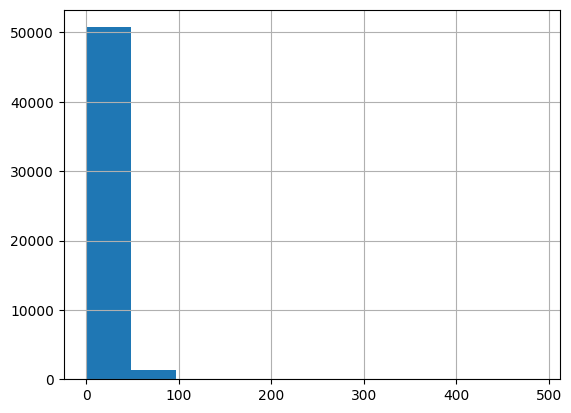

In [67]:
# View the top-heavy distribution
percentiles = [.25, .5, .75, .90, .95, .99, 0.995, 0.999]
print(df_clean['reviews_per_year'].describe(percentiles=percentiles))

df_clean['reviews_per_year'].hist()

 The target variable reviews_per_year was clipped at 100, as values above this threshold represent the top 0.1–0.5% of listings.. This removes outliers corresponding to viral listings with abnormally high review counts that are not representative of typical Airbnb performance

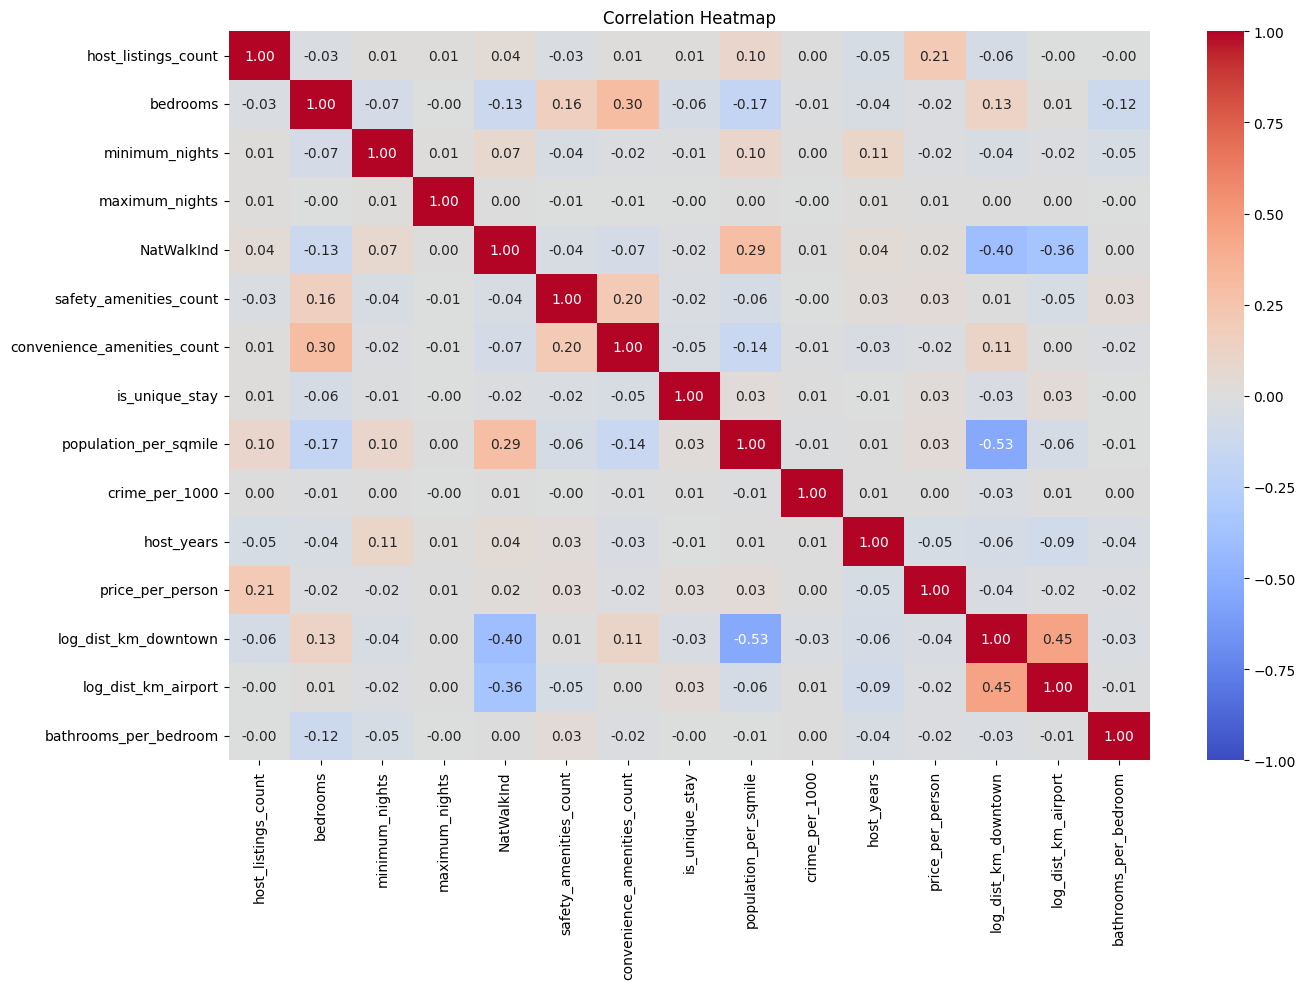

In [ ]:
# select numeric features only
numeric_features = df_clean[['host_listings_count', 'bedrooms', #'accommodates', 
                        'minimum_nights', 'maximum_nights', 'NatWalkInd',
                        'safety_amenities_count', 'convenience_amenities_count',
                        'is_unique_stay', 'population_per_sqmile', 'crime_per_1000',
                        'host_years', 'price_per_person', 'log_dist_km_downtown',
                        'log_dist_km_airport', 'bathrooms_per_bedroom']]

corr = numeric_features.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

#### KNN

target = reviews_per_year

In [ ]:
scaler = StandardScaler()

# define the target and clip
y = df_clean['reviews_per_year'].clip(upper=100)

# X and y
# drop leaky features
X = df_clean.drop(columns=['review_scores_rating', 'stratify_col',
                           'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_response_time_ord',
                           'reviews_per_year', 'listing_age_years'])

# train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df_clean['stratify_col']
)

X_train = X_train.copy()
X_test  = X_test.copy()

# select only existing columns from cols_to_scale
cols_to_use = [i for i in X_train.columns if i in cols_to_scale]
# scale
X_train[cols_to_use] = scaler.fit_transform(X_train[cols_to_use])
X_test[cols_to_use] = scaler.transform(X_test[cols_to_use])

X_train.columns

Index(['host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'bedrooms', 'minimum_nights', 'maximum_nights', 'instant_bookable',
       'NatWalkInd', 'safety_amenities_count', 'convenience_amenities_count',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'is_unique_stay', 'population_per_sqmile',
       'crime_per_1000', 'host_years', 'price_per_person',
       'log_dist_km_downtown', 'log_dist_km_airport', 'source_city_OAK',
       'source_city_SD', 'source_city_SF', 'bathrooms_per_bedroom'],
      dtype='str')

In [ ]:
# define KNN 
knn = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [11, 25, 51, 101],
    'weights': ['uniform', 'distance'],       # uniform or distance-weighted neighbors
    'p': [1, 2],                              # 1=Manhattan, 2=Euclidean
}

# Use neg_mean_absolute_error as scoring
grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1,
)

# Fit GridSearchCV
grid.fit(X_train, y_train)

# Best hyperparameters
print("Best KNN parameters:", grid.best_params_)
best_knn_1 = grid.best_estimator_

# Predict on test set
y_pred = best_knn_1.predict(X_test)

# metrics
r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n--- Final Best Model Results - KNN - (Test Set) ---")
print(f"R2 Score: {r2:.4f}")
print(f"MAE:      {mae:.4f}")
print(f"RMSE:     {rmse:.4f}")
# Define the metrics
scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

# Run cross-validation with return_train_score=True
cv_results = cross_validate(
    best_knn_1,
    X_train,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

print("--- Cross-Validation Results (Train vs Val) ---")

# R²
print(f"R²   | Train: {cv_results['train_r2'].mean():.4f} ± {cv_results['train_r2'].std():.4f} | "
      f"Val: {cv_results['test_r2'].mean():.4f} ± {cv_results['test_r2'].std():.4f}")

# RMSE
print(f"RMSE | Train: {-cv_results['train_rmse'].mean():.4f} ± {cv_results['train_rmse'].std():.4f} | "
      f"Val: {-cv_results['test_rmse'].mean():.4f} ± {cv_results['test_rmse'].std():.4f}")

# MAE
print(f"MAE  | Train: {-cv_results['train_mae'].mean():.4f} ± {cv_results['train_mae'].std():.4f} | "
      f"Val: {-cv_results['test_mae'].mean():.4f} ± {cv_results['test_mae'].std():.4f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best KNN parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

--- Final Best Model Results - KNN - (Test Set) ---
R2 Score: 0.3254
MAE:      7.6913
RMSE:     11.4440
--- Cross-Validation Results (Train vs Val) ---
R²   | Train: 0.9979 ± 0.0004 | Val: 0.3048 ± 0.0095
RMSE | Train: 0.6408 ± 0.0616 | Val: 11.6944 ± 0.0722
MAE  | Train: 0.0185 ± 0.0020 | Val: 7.8445 ± 0.0310


change the params to overcome overfitting

In [ ]:
# define KNN 
knn = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [11, 25, 51, 101],
    'weights': ['uniform'],       # uniform 
    'p': [1, 2],                  # 1=Manhattan, 2=Euclidean
}

# Use neg_mean_absolute_error as scoring
grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1,
)

# Fit GridSearchCV
grid.fit(X_train, y_train)

# Best hyperparameters
print("Best KNN parameters:", grid.best_params_)
best_knn = grid.best_estimator_

# Predict on test set
y_pred = best_knn.predict(X_test)


# metrics
r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n--- Final Best Model Results - KNN - (Test Set) ---")
print(f"R2 Score: {r2:.4f}")
print(f"MAE:      {mae:.4f}")
print(f"RMSE:     {rmse:.4f}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best KNN parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

--- Final Best Model Results - KNN - (Test Set) ---
R2 Score: 0.2915
MAE:      7.9818
RMSE:     11.7281


In [19]:
# Define the metrics
scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

# Run cross-validation with return_train_score=True
cv_results = cross_validate(
    best_knn,
    X_train,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

print("--- Cross-Validation Results (Train vs Val) ---")

# R²
print(f"R²   | Train: {cv_results['train_r2'].mean():.4f} ± {cv_results['train_r2'].std():.4f} | "
      f"Val: {cv_results['test_r2'].mean():.4f} ± {cv_results['test_r2'].std():.4f}")

# RMSE
print(f"RMSE | Train: {-cv_results['train_rmse'].mean():.4f} ± {cv_results['train_rmse'].std():.4f} | "
      f"Val: {-cv_results['test_rmse'].mean():.4f} ± {cv_results['test_rmse'].std():.4f}")

# MAE
print(f"MAE  | Train: {-cv_results['train_mae'].mean():.4f} ± {cv_results['train_mae'].std():.4f} | "
      f"Val: {-cv_results['test_mae'].mean():.4f} ± {cv_results['test_mae'].std():.4f}")

--- Cross-Validation Results (Train vs Val) ---
R²   | Train: 0.3988 ± 0.0022 | Val: 0.2736 ± 0.0090
RMSE | Train: 10.8760 ± 0.0234 | Val: 11.9544 ± 0.0621
MAE  | Train: 7.3929 ± 0.0124 | Val: 8.1595 ± 0.0260


#### Random forest
target = reviews_per_year

In [ ]:
# define the target and clip
y = df_clean['reviews_per_year'].clip(upper=100)

# X and y
# drop leaky features
X = df_clean.drop(columns=['review_scores_rating', 'stratify_col',
                            'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_response_time_ord',
                            'reviews_per_year', 'listing_age_years'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df_clean['stratify_col']
)

X_train = X_train.copy()
X_test  = X_test.copy()

In [21]:

# param and gridsearch
param_grid = {
    'n_estimators'    : [100, 200],
    'max_depth'       : [10, 20],
    'min_samples_split': [20, 100, 500],
    'min_samples_leaf' : [20, 100, 500],
    'max_features'    : ['sqrt', 0.3],
    'max_samples'     : [0.8]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=1),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# get the best model
best_rf = grid_search.best_estimator_
print(f"\nBest Parameters: {grid_search.best_params_}")

# predict and back-transform
y_pred = best_rf.predict(X_test)

# metrics
r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n--- Final Best Model Results - Random Forest - (Test Set) ---")
print(f"R2 Score: {r2:.4f}")
print(f"MAE:      {mae:.4f}")
print(f"RMSE:     {rmse:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best Parameters: {'max_depth': 20, 'max_features': 0.3, 'max_samples': 0.8, 'min_samples_leaf': 20, 'min_samples_split': 20, 'n_estimators': 200}

--- Final Best Model Results - Random Forest - (Test Set) ---
R2 Score: 0.3973
MAE:      7.1725
RMSE:     10.8173


In [22]:
# Define the metrics
scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}


# Run cross-validation with return_train_score=True
cv_results = cross_validate(
    best_rf,
    X_train,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

print("--- Cross-Validation Results (Train vs Val) ---")

# R²
print(f"R²   | Train: {cv_results['train_r2'].mean():.4f} ± {cv_results['train_r2'].std():.4f} | "
      f"Val: {cv_results['test_r2'].mean():.4f} ± {cv_results['test_r2'].std():.4f}")

# RMSE
print(f"RMSE | Train: {-cv_results['train_rmse'].mean():.4f} ± {cv_results['train_rmse'].std():.4f} | "
      f"Val: {-cv_results['test_rmse'].mean():.4f} ± {cv_results['test_rmse'].std():.4f}")

# MAE
print(f"MAE  | Train: {-cv_results['train_mae'].mean():.4f} ± {cv_results['train_mae'].std():.4f} | "
      f"Val: {-cv_results['test_mae'].mean():.4f} ± {cv_results['test_mae'].std():.4f}")

--- Cross-Validation Results (Train vs Val) ---
R²   | Train: 0.4720 ± 0.0015 | Val: 0.3859 ± 0.0055
RMSE | Train: 10.1920 ± 0.0256 | Val: 10.9914 ± 0.1027
MAE  | Train: 6.7257 ± 0.0131 | Val: 7.2854 ± 0.0455


#### XGBoost
target = reviews_per_year

In [ ]:
# define the target and clip
y = df_clean['reviews_per_year'].clip(upper=100)

# X and y
# drop leaky features
X = df_clean.drop(columns=['review_scores_rating', 'stratify_col',
                           'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_response_time_ord',
                           'reviews_per_year', 'listing_age_years'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df_clean['stratify_col']
)

X_train = X_train.copy()
X_test  = X_test.copy()

#
param_grid = {
    'max_depth'       : [15, 20],          # deep trees
    'min_child_weight': [5, 10, 20],       # small leaves
    'learning_rate'   : [0.005, 0.01],
    'n_estimators'    : [1000, 2000],
    'subsample'       : [0.8],
    'colsample_bytree': [0.7],
    'reg_alpha'       : [0],               # no regularization
    'reg_lambda'      : [1],
}
# initialize regressor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=1,
    tree_method='hist'
)

scoring_metrics = {
    'mae' : 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2'  : 'r2'
}

# run grid search
grid_xgb_1 = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring=scoring_metrics,
    refit='mae',
    verbose=1,
    n_jobs=-1,
)

grid_xgb_1.fit(X_train, y_train)

# get the best model
best_xgb_1 = grid_xgb_1.best_estimator_
print(f"Best Params: {grid_xgb_1.best_params_}")

# predict
y_pred = best_xgb_1.predict(X_test)

# metrics
r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n--- Final Best Model Results - XGBoost - (Test Set) ---")
print(f"R2 Score: {r2:.4f}")
print(f"MAE:      {mae:.4f}")
print(f"RMSE:     {rmse:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/Divya/Desktop/milestone_2_project/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 15, 'min_child_weight': 10, 'n_estimators': 2000, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}

--- Final Best Model Results - XGBoost - (Test Set) ---
R2 Score: 0.4830
MAE:      6.4723
RMSE:     10.0184


In [24]:
# Define the metrics
scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}


# Run cross-validation with return_train_score=True
cv_results = cross_validate(
    best_xgb_1,
    X_train,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

print("--- Cross-Validation Results (Train vs Val) ---")

# R²
print(f"R²   | Train: {cv_results['train_r2'].mean():.4f} ± {cv_results['train_r2'].std():.4f} | "
      f"Val: {cv_results['test_r2'].mean():.4f} ± {cv_results['test_r2'].std():.4f}")

# RMSE
print(f"RMSE | Train: {-cv_results['train_rmse'].mean():.4f} ± {cv_results['train_rmse'].std():.4f} | "
      f"Val: {-cv_results['test_rmse'].mean():.4f} ± {cv_results['test_rmse'].std():.4f}")

# MAE
print(f"MAE  | Train: {-cv_results['train_mae'].mean():.4f} ± {cv_results['train_mae'].std():.4f} | "
      f"Val: {-cv_results['test_mae'].mean():.4f} ± {cv_results['test_mae'].std():.4f}")

--- Cross-Validation Results (Train vs Val) ---
R²   | Train: 0.9676 ± 0.0008 | Val: 0.4721 ± 0.0064
RMSE | Train: 2.5259 ± 0.0332 | Val: 10.1911 ± 0.1001
MAE  | Train: 1.5098 ± 0.0186 | Val: 6.5985 ± 0.0487


We can clearly see the gap between train and val r2 (0.91 vs 0.47), train mae vs val mae (2.5 vs 6.5) which means the model is overfitting. So lets make the trees shallow, increase min child weight.

### XGBoost 2 to generalize better 

In [ ]:

# define the target and clip
y = df_clean['reviews_per_year'].clip(upper=100)

# X and y
# drop leaky features
X = df_clean.drop(columns=['review_scores_rating', 'stratify_col',
                           'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_response_time_ord',
                           'reviews_per_year', 'listing_age_years'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df_clean['stratify_col']
)

X_train = X_train.copy()
X_test  = X_test.copy()

# params
param_grid = {
    'max_depth'       : [5, 8, 10],        # shallower
    'min_child_weight': [50, 100, 200],    # larger leaves
    'learning_rate'   : [0.005, 0.01],
    'n_estimators'    : [1000, 2000],
    'subsample'       : [0.8],
    'colsample_bytree': [0.7],
    'reg_alpha'       : [0.1, 1.0],        # L1 regularization
    'reg_lambda'      : [5]
}

# initialize regressor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=1,
    tree_method='hist'
)

scoring_metrics = {
    'mae' : 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2'  : 'r2'
}

# run grid search
grid_xgb_2 = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring=scoring_metrics,
    refit='mae',
    verbose=1,
    n_jobs=-1,
    return_train_score=True
)

grid_xgb_2.fit(X_train, y_train)

# get the best model
best_xgb_2 = grid_xgb_2.best_estimator_
print(f"Best Params: {grid_xgb_2.best_params_}")

# predict and back-transform
y_pred = best_xgb_2.predict(X_test)

# metrics
r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n--- Final Best Model Results - XGBoost - (Test Set) ---")
print(f"R2 Score: {r2:.4f}")
print(f"MAE:      {mae:.4f}")
print(f"RMSE:     {rmse:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 2000, 'reg_alpha': 1.0, 'reg_lambda': 5, 'subsample': 0.8}

--- Final Best Model Results - XGBoost - (Test Set) ---
R2 Score: 0.4579
MAE:      6.6782
RMSE:     10.2591


In [26]:
# Define the metrics
scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}


# Run cross-validation with return_train_score=True
cv_results = cross_validate(
    best_xgb_2,
    X_train,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

print("--- Cross-Validation Results (Train vs Val) ---")

# R²
print(f"R²   | Train: {cv_results['train_r2'].mean():.4f} ± {cv_results['train_r2'].std():.4f} | "
      f"Val: {cv_results['test_r2'].mean():.4f} ± {cv_results['test_r2'].std():.4f}")

# RMSE
print(f"RMSE | Train: {-cv_results['train_rmse'].mean():.4f} ± {cv_results['train_rmse'].std():.4f} | "
      f"Val: {-cv_results['test_rmse'].mean():.4f} ± {cv_results['test_rmse'].std():.4f}")

# MAE
print(f"MAE  | Train: {-cv_results['train_mae'].mean():.4f} ± {cv_results['train_mae'].std():.4f} | "
      f"Val: {-cv_results['test_mae'].mean():.4f} ± {cv_results['test_mae'].std():.4f}")

--- Cross-Validation Results (Train vs Val) ---
R²   | Train: 0.6914 ± 0.0023 | Val: 0.4520 ± 0.0045
RMSE | Train: 7.7923 ± 0.0338 | Val: 10.3837 ± 0.0888
MAE  | Train: 5.1071 ± 0.0189 | Val: 6.7746 ± 0.0621


The gap between train and val scores is reduced. So overfitting is reduced and we consider this as our best model and do the nalysis. 

 ##### Sensitivity Analysis

In [ ]:
# extract cv results
results_df = pd.DataFrame(grid_xgb_2.cv_results_)
# results_df.to_csv("xgboost_reviews_results_df.csv")

best_params = grid_xgb_2.best_params_

# fix other params, vary only max_depth
depth_results = results_df[
    (results_df['param_n_estimators']     == best_params['n_estimators']) &
    (results_df['param_min_child_weight'] == best_params['min_child_weight']) &
    (results_df['param_learning_rate']    == best_params['learning_rate']) &
    (results_df['param_reg_alpha']        == best_params['reg_alpha']) &
    (results_df['param_reg_lambda']       == best_params['reg_lambda'])
]

print(f"Rows matched: {len(depth_results)}")  # should equal number of max_depth values

# MAE
depth_results['train_mae'] = depth_results.apply(
    lambda x: f"{-x['mean_train_mae']:.4f} ± {x['std_train_mae']:.4f}", axis=1
)
depth_results['val_mae'] = depth_results.apply(
    lambda x: f"{-x['mean_test_mae']:.4f} ± {x['std_test_mae']:.4f}", axis=1
)

# RMSE
depth_results['train_rmse'] = depth_results.apply(
    lambda x: f"{-x['mean_train_rmse']:.4f} ± {x['std_train_rmse']:.4f}", axis=1
)
depth_results['val_rmse'] = depth_results.apply(
    lambda x: f"{-x['mean_test_rmse']:.4f} ± {x['std_test_rmse']:.4f}", axis=1
)

# R2
depth_results['train_r2'] = depth_results.apply(
    lambda x: f"{x['mean_train_r2']:.4f} ± {x['std_train_r2']:.4f}", axis=1
)
depth_results['val_r2'] = depth_results.apply(
    lambda x: f"{x['mean_test_r2']:.4f} ± {x['std_test_r2']:.4f}", axis=1
)

# sort for report
depth_sensitivity = depth_results[[
    'param_max_depth',
    'train_mae', 'val_mae',
    'train_rmse', 'val_rmse',
    'train_r2', 'val_r2',
]].sort_values('param_max_depth')

print("\n--- Sensitivity Analysis: Max Depth ---")
print(depth_sensitivity.to_string(index=False))


Rows matched: 3

--- Sensitivity Analysis: Max Depth ---
 param_max_depth       train_mae         val_mae       train_rmse         val_rmse        train_r2          val_r2
               5 6.6998 ± 0.0116 7.1062 ± 0.0621 10.1318 ± 0.0230 10.7760 ± 0.0828 0.4783 ± 0.0014 0.4098 ± 0.0040
               8 5.7289 ± 0.0136 6.8654 ± 0.0639  8.7161 ± 0.0266 10.4916 ± 0.0876 0.6139 ± 0.0017 0.4405 ± 0.0045
              10 5.1071 ± 0.0189 6.7746 ± 0.0621  7.7923 ± 0.0338 10.3837 ± 0.0888 0.6914 ± 0.0023 0.4520 ± 0.0045


As max depth increases from 5 to 10, validation MAE improves from 7.10 to 6.77 and validation R² increases from 0.41 to 0.45, indicating that the model benefits from added complexity and reduced bias. However, the train–validation gap widens noticeably at depth 10, with train R² reaching 0.691 compared to validation R² of 0.452, signaling increasing overfitting. The model is clearly sensitive to this parameter: while deeper trees continue to improve validation performance up to this point, they also increase variance. Although overfitting has not yet degraded validation metrics, the expanding gap suggests that increasing depth beyond 10 would likely amplify overfitting without yielding meaningful additional improvements in validation performance.


In [28]:
results_df = pd.DataFrame(grid_xgb_2.cv_results_)
weight_results = results_df[
    (results_df['param_max_depth']        == best_params['max_depth']) &
    (results_df['param_n_estimators']     == best_params['n_estimators']) &
    (results_df['param_learning_rate']    == best_params['learning_rate']) &
    (results_df['param_reg_alpha']        == best_params['reg_alpha']) & 
    (results_df['param_reg_lambda']       == best_params['reg_lambda'])
]

print(f"Rows matched: {len(weight_results)}")  # should equal number of min_child_weight values

# MAE
weight_results['train_mae'] = weight_results.apply(
    lambda x: f"{-x['mean_train_mae']:.4f} ± {x['std_train_mae']:.4f}", axis=1
)
weight_results['val_mae'] = weight_results.apply(
    lambda x: f"{-x['mean_test_mae']:.4f} ± {x['std_test_mae']:.4f}", axis=1
)

# RMSE
weight_results['train_rmse'] = weight_results.apply(
    lambda x: f"{-x['mean_train_rmse']:.4f} ± {x['std_train_rmse']:.4f}", axis=1
)
weight_results['val_rmse'] = weight_results.apply(
    lambda x: f"{-x['mean_test_rmse']:.4f} ± {x['std_test_rmse']:.4f}", axis=1
)

# R2
weight_results['train_r2'] = weight_results.apply(
    lambda x: f"{x['mean_train_r2']:.4f} ± {x['std_train_r2']:.4f}", axis=1
)
weight_results['val_r2'] = weight_results.apply(
    lambda x: f"{x['mean_test_r2']:.4f} ± {x['std_test_r2']:.4f}", axis=1
)

# sort for report
weight_sensitivity = weight_results[[
    'param_min_child_weight',
    'train_mae', 'val_mae',
    'train_rmse', 'val_rmse',
    'train_r2', 'val_r2',
]].sort_values('param_min_child_weight')

print("\n--- Sensitivity Analysis: min_child_weight ---")
print(weight_sensitivity.to_string(index=False))

Rows matched: 3

--- Sensitivity Analysis: min_child_weight ---
 param_min_child_weight       train_mae         val_mae      train_rmse         val_rmse        train_r2          val_r2
                     50 5.1071 ± 0.0189 6.7746 ± 0.0621 7.7923 ± 0.0338 10.3837 ± 0.0888 0.6914 ± 0.0023 0.4520 ± 0.0045
                    100 5.6564 ± 0.0107 6.8660 ± 0.0656 8.6166 ± 0.0238 10.4918 ± 0.0840 0.6226 ± 0.0013 0.4405 ± 0.0048
                    200 6.1383 ± 0.0100 6.9623 ± 0.0630 9.3418 ± 0.0187 10.6126 ± 0.0805 0.5565 ± 0.0009 0.4275 ± 0.0046


Min child weight controls the minimum number of samples required to split a node. Higher values force the tree to generalize more by preventing splits on small groups of samples. However, in our results, increasing min child weight from 50 to 200 worsens validation MAE from 6.77 to 6.96, suggesting the model is being over-regularized and useful patterns in the data are being ignored. A value of 50 allows enough granularity and performs best in our case.


##### Feature Importance and Ablation Analysis

In [29]:
# Get importance and match with feature names
importances = best_xgb_2.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp

minimum_nights                 0.190563
bathrooms_per_bedroom          0.073675
source_city_SD                 0.067192
room_type_Private room         0.064074
source_city_OAK                0.061345
maximum_nights                 0.057540
bedrooms                       0.045823
source_city_SF                 0.041121
host_listings_count            0.037485
safety_amenities_count         0.032425
instant_bookable               0.030223
host_has_profile_pic           0.029114
host_years                     0.028035
room_type_Hotel room           0.026147
price_per_person               0.025976
log_dist_km_airport            0.024710
host_identity_verified         0.024614
log_dist_km_downtown           0.022075
population_per_sqmile          0.021266
crime_per_1000                 0.021207
convenience_amenities_count    0.020630
NatWalkInd                     0.020206
room_type_Shared room          0.018836
is_unique_stay                 0.015718
dtype: float32

In [30]:
top_5 = feat_imp.head(5)
top_features = top_5.index.tolist()  # top 5 features
ablation_results = []
scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

# 
# baseline - no features removed
cv_base = cross_validate(
    XGBRegressor(**best_xgb_2.get_params()),
    X_train, y_train,
    cv=5, scoring=scoring, n_jobs=-1
)
ablation_results.append({
    "removed_count": 0,
    "removed_features": "none",
    "mae_mean":  -cv_base['test_mae'].mean(),
    "mae_std":    cv_base['test_mae'].std(),
    "rmse_mean": -cv_base['test_rmse'].mean(),
    "rmse_std":   cv_base['test_rmse'].std(),
    "r2_mean":    cv_base['test_r2'].mean(),
    "r2_std":     cv_base['test_r2'].std()
})

# cumulatively remove features

for i in range(1, len(top_features) + 1):
    features_to_remove = top_features[:i]
    X_train_ablate = X_train.drop(columns=features_to_remove)
    
    # best parameters 
    model = XGBRegressor(**best_xgb_2.get_params())
    
    # cross validate
    cv_results = cross_validate(
        model, X_train_ablate, y_train, 
        cv=5, scoring=scoring, n_jobs=-1
    )
    
    ablation_results.append({
        "removed_count": i,
        "removed_features": ", ".join(features_to_remove),
        "mae_mean": -cv_results['test_mae'].mean(),
        "mae_std":  cv_results['test_mae'].std(),  
        "rmse_mean": -cv_results['test_rmse'].mean(),
        "rmse_std":  cv_results['test_rmse'].std(),
        "r2_mean": cv_results['test_r2'].mean(),
        "r2_std":  cv_results['test_r2'].std()
    })

ablation_df = pd.DataFrame(ablation_results)
ablation_df


,removed_count,removed_features,mae_mean,mae_std,rmse_mean,rmse_std,r2_mean,r2_std
0,0,none,6.774641,0.062136,10.383735,0.088784,0.451952,0.004529
1,1,minimum_nights,7.696011,0.070735,11.369372,0.112160,0.342948,0.009030
2,2,"minimum_nights, bathrooms_per_bedroom",7.871472,0.066585,11.555606,0.099696,0.321252,0.007615
3,3,"minimum_nights, bathrooms_per_bedroom, source_...",7.890674,0.070649,11.575637,0.091698,0.318910,0.005438
4,4,"minimum_nights, bathrooms_per_bedroom, source_...",8.007748,0.059258,11.714236,0.087735,0.302504,0.004773
5,5,"minimum_nights, bathrooms_per_bedroom, source_...",8.006735,0.064434,11.711703,0.090229,0.302805,0.005255


With all features intact, the model achieves an MAE of 6.77 and R² of 0.45. Removing just the top feature (minimum_nights) causes MAE to increase by 13.7% (6.77 → 7.70) and R² to drop by 24.2% (0.4521 → 0.3426), confirming that minimum_nights is by far the most influential feature. As features are removed cumulatively, performance continues to degrade, with MAE reaching 8.01 and R² falling to 0.30 after all five features are removed — a total degradation of 18.3% in MAE and 32.9% in R². Notably, the largest single drop occurs at removal of the first feature, with diminishing impact from each subsequent removal.


In [31]:
bottom_n = feat_imp.tail(10)
bottom_features = bottom_n.index.tolist()[::-1]   # bottom features
ablation_results = []

scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

for i in range(1, len(bottom_features) + 1):
    features_to_remove = bottom_features[:i]
    X_train_ablate = X_train.drop(columns=features_to_remove)
    
    # best parameters 
    model = XGBRegressor(**best_xgb_2.get_params())
    
    # cross validate
    cv_results = cross_validate(
        model, X_train_ablate, y_train, 
        cv=5, scoring=scoring, n_jobs=-1
    )
    
    ablation_results.append({
        "removed_count": i,
        "removed_features": ", ".join(features_to_remove),
        "mae_mean": -cv_results['test_mae'].mean(),
        "mae_std":  cv_results['test_mae'].std(),  
        "rmse_mean": -cv_results['test_rmse'].mean(),
        "rmse_std":  cv_results['test_rmse'].std(),
        "r2_mean": cv_results['test_r2'].mean(),
        "r2_std":  cv_results['test_r2'].std()
    })

ablation_df = pd.DataFrame(ablation_results)
ablation_df

,removed_count,removed_features,mae_mean,mae_std,rmse_mean,rmse_std,r2_mean,r2_std
0,1,is_unique_stay,6.771171,0.060885,10.383903,0.089626,0.451937,0.004399
1,2,"is_unique_stay, room_type_Shared room",6.768662,0.058518,10.385587,0.085471,0.451757,0.004153
2,3,"is_unique_stay, room_type_Shared room, NatWalkInd",6.785666,0.062916,10.402578,0.089612,0.449960,0.004789
3,4,"is_unique_stay, room_type_Shared room, NatWalk...",6.794131,0.063015,10.422921,0.092466,0.447810,0.004767
4,5,"is_unique_stay, room_type_Shared room, NatWalk...",6.804192,0.074450,10.446447,0.087904,0.445316,0.003923
5,6,"is_unique_stay, room_type_Shared room, NatWalk...",6.838874,0.059992,10.483893,0.088751,0.441332,0.004169
6,7,"is_unique_stay, room_type_Shared room, NatWalk...",6.893757,0.064327,10.562843,0.091579,0.432887,0.004378
7,8,"is_unique_stay, room_type_Shared room, NatWalk...",6.892826,0.067848,10.564680,0.091514,0.432692,0.004035
8,9,"is_unique_stay, room_type_Shared room, NatWalk...",7.002181,0.068055,10.729900,0.093354,0.414804,0.004813
9,10,"is_unique_stay, room_type_Shared room, NatWalk...",7.097029,0.046216,10.831358,0.098549,0.403678,0.006184


### Failure Analysis

In [32]:
failure_df = X_test.copy()
xgb_preds = y_pred
errors = np.abs(y_test - xgb_preds)
failure_df['y_true'] = y_test
failure_df['y_pred'] = xgb_preds
failure_df['abs_error'] = errors

top_failures = failure_df.sort_values('abs_error', ascending=False).head(50)
top_failures

,host_listings_count,host_has_profile_pic,host_identity_verified,bedrooms,minimum_nights,maximum_nights,instant_bookable,NatWalkInd,safety_amenities_count,convenience_amenities_count,room_type_Hotel room,room_type_Private room,room_type_Shared room,is_unique_stay,population_per_sqmile,crime_per_1000,host_years,price_per_person,log_dist_km_downtown,log_dist_km_airport,source_city_OAK,source_city_SD,source_city_SF,bathrooms_per_bedroom,y_true,y_pred,abs_error
37236,1.0,1.0,1.0,1.0,30,365,1.0,18.444444,4,5,0,1,0,0,15819.141173,86.781029,0.61,97.000000,2.295776,2.975549,0,0,0,1.000000,100.000000,5.917278,94.082722
34867,59.0,1.0,1.0,0.0,1,1125,1.0,17.733333,1,5,0,1,0,0,19295.084320,0.192678,6.42,49.500000,3.481813,3.365674,0,0,0,1.000000,100.000000,18.503336,81.496664
6645,1.0,1.0,1.0,1.0,1,365,1.0,12.583333,2,5,0,1,0,0,72288.503316,208.430008,1.85,60.000000,0.250510,2.997515,0,0,1,1.000000,100.000000,26.384619,73.615381
9621,1.0,1.0,1.0,0.0,1,7,0.0,16.750000,4,4,0,0,0,0,11193.729660,87.832973,10.31,86.500000,3.078635,2.203228,0,0,0,1.000000,100.000000,27.420519,72.579481
27619,1.0,1.0,1.0,1.0,1,1125,0.0,14.133333,3,4,0,1,0,0,7466.081466,50.049391,9.29,50.000000,2.798337,2.715882,0,0,0,1.000000,86.720911,17.665565,69.055346
44250,43.0,1.0,1.0,2.0,31,31,0.0,16.722222,4,8,0,0,0,0,19688.860660,70.599310,10.32,25.833333,0.855057,1.205099,0,1,0,1.000000,76.539577,7.883120,68.656457
4570,281.0,1.0,1.0,0.0,1,1125,1.0,15.333333,4,5,0,0,0,0,68216.513100,146.153846,9.07,60.000000,0.299001,3.007356,0,0,1,1.000000,100.000000,32.451424,67.548576
25078,1.0,1.0,1.0,1.0,2,5,0.0,13.000000,3,5,0,1,0,0,11224.919228,68.812758,9.19,39.500000,2.183392,2.698381,0,0,0,1.000000,90.179434,23.085520,67.093914
12409,4.0,1.0,1.0,2.0,1,1125,1.0,14.888889,4,5,0,0,0,0,7211.809837,30.707610,9.38,48.250000,2.936555,1.632416,0,0,0,0.500000,100.000000,33.115059,66.884941
29070,1.0,1.0,1.0,1.0,1,1125,0.0,15.366667,2,4,0,0,0,0,6210.557703,0.195198,5.27,116.000000,2.762096,3.303077,0,0,0,1.000000,94.737778,27.880732,66.857046


In [40]:
failure_df.loc[[6731, 6645, 27619, 47431]]

,host_listings_count,host_has_profile_pic,host_identity_verified,bedrooms,minimum_nights,maximum_nights,instant_bookable,NatWalkInd,safety_amenities_count,convenience_amenities_count,room_type_Hotel room,room_type_Private room,room_type_Shared room,is_unique_stay,population_per_sqmile,crime_per_1000,host_years,price_per_person,log_dist_km_downtown,log_dist_km_airport,source_city_OAK,source_city_SD,source_city_SF,bathrooms_per_bedroom,y_true,y_pred,abs_error
6731,8.0,1.0,1.0,1.0,1,365,0.0,15.333333,1,3,0,1,0,0,68216.513100,146.153846,1.82,98.0,0.350172,3.000014,0,0,1,0.0,67.792128,2.257774,65.534354
6645,1.0,1.0,1.0,1.0,1,365,1.0,12.583333,2,5,0,1,0,0,72288.503316,208.430008,1.85,60.0,0.250510,2.997515,0,0,1,1.0,100.000000,26.384619,73.615381
27619,1.0,1.0,1.0,1.0,1,1125,0.0,14.133333,3,4,0,1,0,0,7466.081466,50.049391,9.29,50.0,2.798337,2.715882,0,0,0,1.0,86.720911,17.665565,69.055346
47431,1.0,1.0,1.0,1.0,1,365,0.0,12.566667,0,6,0,1,0,0,4741.647500,57.713651,9.37,52.5,2.705492,2.564415,0,1,0,1.0,72.355538,13.132894,59.222644


In [41]:
df.loc[[6731, 6645, 27619, 47431 ]]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry,source_city,index_right,GEOID,ALAND,area_sqmiles,crime_count,population,NatWalkInd,host_response_time_ord,amenities_list,safety_amenities_count,convenience_amenities_count,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,room_type_nan,is_unique_stay,population_per_sqmile,crime_per_1000,crime_per_sqmile,host_years,price_per_person,dist_km_downtown,dist_km_airport,log_dist_km_downtown,log_dist_km_airport,source_city_LA,source_city_OAK,source_city_SD,source_city_SF,source_city_nan,listing_age_years,reviews_per_year,bathrooms_per_bedroom
6731,1076824435567752150,https://www.airbnb.com/rooms/1076824435567752150,20250901181253,2025-09-01,previous scrape,"Homey, Euro-style inn 2 blocks from Union Square",From traditional rooms to luxurious suites ful...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,545598180,https://www.airbnb.com/users/show/545598180,Andrews Hotel,2023-11-08,NaN,Whether you’re traveling for pleasure or busin...,NaN,-1.0,1.00,0.0,https://a0.muscache.com/im/pictures/user/52a9d...,https://a0.muscache.com/im/pictures/user/52a9d...,Lower Nob Hill,8.0,8.0,"['email', 'phone']",1.0,1.0,NaN,Downtown/Civic Center,NaN,37.787981,-122.412271,Room in hotel,Private room,2,0.0,1 private bath,1.0,0.0,"[""Self check-in"", ""Shampoo"", ""Hair dryer"", ""Es...",196.0,1,365,NaN,NaN,NaN,NaN,1.0,1125.0,NaN,NaN,0,0,0,0,2025-09-01,150,84,0,0,110,255,NaN,2024-06-10,2025-04-24,4.67,4.69,4.62,4.88,4.83,4.58,4.69,Exempt,0.0,8,0,8,0,10.02,POINT (-122.4122707 37.7879807),SF,6609.0,6.075012e+09,123394.0,0.047642,475.0,3250.0,15.333333,-1.0,"['Self check-in', 'Shampoo', 'Hair dryer', 'Es...",1,3,0,0,1,0,0,0,68216.513100,146.153846,9970.105761,1.82,98.0,0.419312,19.085822,0.350172,3.000014,0,0,0,1,0,1.227397,67.792128,0.0
6645,1043748646220165881,https://www.airbnb.com/rooms/1043748646220165881,20250901181253,2025-09-01,city scrape,"Bold, boho hideaway in the heart of the city",- You may be placed in a room with 1 or 2 beds...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,543738195,https://www.airbnb.com/users/show/543738195,Hotel Zeppelin San Francisco,2023-10-27,NaN,"Retreat to a bold, bohemian salute to the rebe...",within an hour,1.0,1.00,0.0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Lower Nob Hill,1.0,1.0,['phone'],1.0,1.0,NaN,Downtown/Civic Center,NaN,37.787734,-122.410714,Room in hotel,Private room,2,1.0,1 private bath,1.0,1.0,"[""Dedicated workspace"", ""Essentials"", ""Gym"", ""...",120.0,1,365,1.0,1.0,28.0,731.0,1.0,519.1,NaN,t,28

In [42]:
# df.loc[df['id'].isin([1076824435567752150, 873169882418157150, 833485670916105438, 1043748646220165881])]

In [49]:
failure_df[failure_df['y_pred']>failure_df['y_true']].sort_values('abs_error', ascending=False).head(10)

,host_listings_count,host_has_profile_pic,host_identity_verified,bedrooms,minimum_nights,maximum_nights,instant_bookable,NatWalkInd,safety_amenities_count,convenience_amenities_count,room_type_Hotel room,room_type_Private room,room_type_Shared room,is_unique_stay,population_per_sqmile,crime_per_1000,host_years,price_per_person,log_dist_km_downtown,log_dist_km_airport,source_city_OAK,source_city_SD,source_city_SF,bathrooms_per_bedroom,y_true,y_pred,abs_error
5570,5.0,1.0,1.0,1.0,1,28,0.0,16.666667,2,3,0,1,0,0,86241.459687,261.021505,12.26,38.500000,0.617826,2.958066,0,0,1,1.000000,1.584660,46.379848,44.795189
40635,2.0,1.0,1.0,1.0,1,1125,0.0,13.666667,2,4,0,0,0,0,15055.907008,0.346981,3.89,54.500000,2.889182,1.703328,0,0,0,1.000000,1.857506,40.631413,38.773906
4453,2.0,1.0,1.0,1.0,1,28,1.0,15.166667,4,4,0,1,0,0,17629.153092,74.442354,6.00,75.000000,1.429906,3.053000,0,0,1,1.000000,0.352827,36.114468,35.761640
44007,3.0,1.0,1.0,3.0,1,730,0.0,15.722222,4,10,0,0,0,0,14513.213178,49.645390,11.81,37.181818,1.285707,1.541206,0,1,0,0.666667,12.335984,47.433331,35.097346
41980,2.0,1.0,1.0,0.0,1,31,0.0,16.041667,4,4,0,0,0,0,11303.368469,38.076641,11.51,63.000000,1.256804,1.929231,0,1,0,1.000000,8.907162,43.373917,34.466755
34643,1.0,1.0,0.0,1.0,1,14,1.0,14.916667,4,10,0,0,0,0,8114.521152,56.880109,10.59,86.000000,1.571620,3.163752,0,0,0,1.000000,9.864865,44.018726,34.153861
33958,2.0,1.0,1.0,0.0,2,25,0.0,8.333333,4,4,0,0,0,0,242.780068,250.000000,13.05,86.000000,3.712780,3.359935,0,0,0,1.000000,1.495902,35.332687,33.836786
8073,2.0,1.0,1.0,2.0,1,25,1.0,9.555556,4,5,0,0,0,0,296.751665,22.953328,13.04,82.333333,3.503780,3.189195,0,0,0,0.500000,4.539801,38.182430,33.642629
16442,1.0,1.0,1.0,2.0,1,25,0.0,15.750000,4,7,0,0,0,0,11330.584313,40.630975,9.20,11.187500,3.309243,2.942464,0,0,0,1.000000,4.376171,36.431423,32.055252
50092,5.0,1.0,1.0,1.0,1,28,1.0,15.500000,3,8,0,0,0,0,6459.590553,62.921348,1.44,116.500000,1.163517,0.963294,0,1,0,1.000000,8.452632,40.324356,31.871725


In [50]:
df.loc[[33958]]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry,source_city,index_right,GEOID,ALAND,area_sqmiles,crime_count,population,NatWalkInd,host_response_time_ord,amenities_list,safety_amenities_count,convenience_amenities_count,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,room_type_nan,is_unique_stay,population_per_sqmile,crime_per_1000,crime_per_sqmile,host_years,price_per_person,dist_km_downtown,dist_km_airport,log_dist_km_downtown,log_dist_km_airport,source_city_LA,source_city_OAK,source_city_SD,source_city_SF,source_city_nan,listing_age_years,reviews_per_year,bathrooms_per_bedroom
33958,1201432814078237120,https://www.airbnb.com/rooms/1201432814078237120,20250901181307,2025-09-02,city scrape,Serra Retreat Guesthouse,Romantic and spacious hideaway in Serra Retrea...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,3299175,https://www.airbnb.com/users/show/3299175,Maggie,2012-08-18,"Malibu, CA",My family and friends are the most important t...,within a day,0.5,0.13,0.0,https://a0.muscache.com/im/users/3299175/profi...,https://a0.muscache.com/im/users/3299175/profi...,Malibu,2.0,2.0,"['email', 'phone']",1.0,1.0,NaN,Malibu,Other Cities,34.043544,-118.683728,Entire guesthouse,Entire home/apt,4,1.0,1 bath,0.0,2.0,"[""Conditioner"", ""First aid kit"", ""Private entr...",344.0,2,25,2.0,2.0,25.0,25.0,2.0,25.0,NaN,t,0,0,0,129,2025-09-02,2,1,0,0,2,6,2064.0,2024-08-31,2024-10-06,5.0,5.0,5.0,5.0,5.0,5.0,5.0,STR24-0074,0.0,2,1,1,0,0.16,POINT (-118.6837279 34.0435442),LA,237.0,6.037801e+09,21592239.0,8.336763,506.0,2024.0,8.333333,2.0,"['Conditioner', 'First aid kit', 'Private entr...",4,4,1,0,0,0,0,0,242.780068,250.0,60.695017,13.05,86.0,39.967551,27.787324,3.71278,3.359935,1,0,0,0,0,1.005479,1.495902,1.0


#### Failure 1 - index 6731 - listing ID 1076824435567752150
y_actual = 67.79	y_pred = 2.25
One failure occurred for a listing where bathrooms data is missing and imputed as 0. Despite other features being normal and minimum_nights = 1, the model predicted 2.2 reviews per year, while the true value was 67. This illustrates a failure category due to missing or mis-imputed features, creating unrealistic combinations. Future improvements could include smarter imputation strategies or feature flags for missing values to prevent the model from misinterpreting missing data.

#### Failure 2 - index 27619 - listing ID 873169882418157150
y_actaul = 86.7	y_pred = 17.6
Despite a decent price per person, the model predicted only 17 reviews per year, whereas the true value was 86. The host may have uploaded high-quality photos or optimized their listings in ways that attracted more customers. Our model did not capture these latent features, such as photo quality or quantity, which contributed to the underprediction. This illustrates a failure category due to latent listing quality that is not captured in the current features. Future improvements could include adding features that reflect these factors, such as number and quality of photos.

#### Failure 3 - index 47431 - listing ID 833485670916105438
y_actual =72.36	y_pred = 13.13
The model underpredicted the number of reviews because the listing had a low engineered safety amenity count, which the model treated as a proxy for quality. However, the listing still received many reviews, likely due to intangible factors such as spaciousness, ambiance, or overall guest experience.

Since the model did not incorporate textual or semantic features from the description or neighborhood fields, it failed to capture these latent qualities. This represents a latent feature omission, where important experiential signals were not encoded into the model.

#### Failure 4 – index 6645 - listing ID 1043748646220165881

y_actual = 100	y_pred = 26.8
This failure occurred for  a multi-unit property. The model predicted a low number of reviews based on amenities and listing-level features. However, since it is a multi-unit property, it likely receives more bookings and therefore more reviews.

Our dataset does not include a feature distinguishing multi-unit from single-unit listings. As a result, the model underestimated demand. Future models should include a multi-unit indicator to improve predictions.

#### Failure 5 – index 33958 - listing ID 1201432814078237120

y_actual = 1.49	y_pred = 35.33
This failure occurred for  a multi-unit property. The model predicted a low number of reviews based on amenities and listing-level features. However, since it is a multi-unit property, it likely receives more bookings and therefore more reviews.

Our dataset does not include a feature distinguishing multi-unit from single-unit listings. As a result, the model underestimated demand. Future models should include a multi-unit indicator to improve predictions.

#### Learning Curves

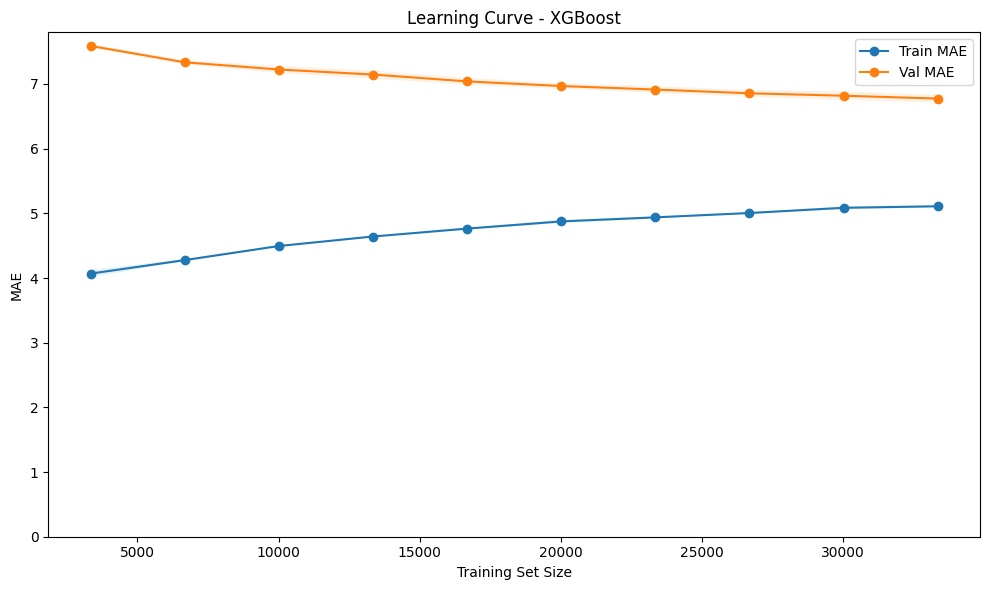

In [36]:
train_sizes, train_scores, val_scores = learning_curve(
    best_xgb_2,
    X_train, y_train,
    cv=5,
    scoring='neg_mean_absolute_error',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# convert to positive MAE
train_mae = -train_scores.mean(axis=1)
val_mae   = -val_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_std   = val_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mae, label='Train MAE', marker='o')
plt.plot(train_sizes, val_mae,   label='Val MAE',   marker='o')
plt.fill_between(train_sizes, train_mae - train_std, train_mae + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mae   - val_std,   val_mae   + val_std,   alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('MAE')
plt.ylim(bottom=0)
plt.title('Learning Curve - XGBoost')
plt.legend()
plt.tight_layout()
plt.show()

In [52]:
val_mae

array([7.58848047, 7.33531871, 7.22385876, 7.14615914, 7.04002313,
       6.96847457, 6.91391585, 6.85599186, 6.81858423, 6.77429727])

# shap

100%|===================| 41696/41699 [107:16<00:00]        

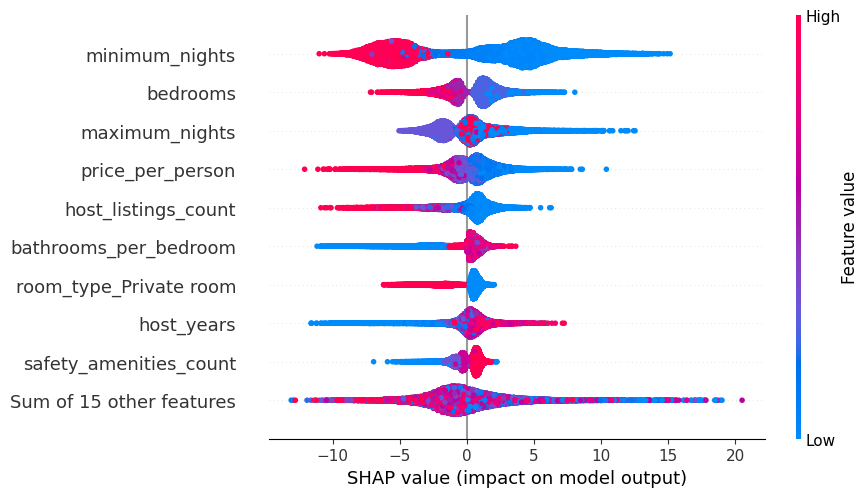

In [35]:
# Create explainer
explainer = shap.Explainer(best_xgb_2, X_train)

# Compute SHAP values
shap_values = explainer(X_train)

# Beeswarm plot
shap.plots.beeswarm(shap_values)